#### *Fake News Prediction using Natural Language Processing*
##### Name and Roll no. of members:
#####       1. Aryan Jain 21055
#####       2. Siddhi Pravin Lipare 21262

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV # GridSearchCV for hyperparameter tuning and cross-validation, train_test_split for splitting data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,HashingVectorizer # for converting text to vectors
from sklearn.feature_selection import VarianceThreshold # for feature selection
from sklearn.linear_model import PassiveAggressiveClassifier # for classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier # for classification
from sklearn.linear_model import LogisticRegression # for classification
from sklearn.svm import SVC, LinearSVC # for classification
from sklearn.neighbors import KNeighborsClassifier # for classification
from sklearn.naive_bayes import MultinomialNB # for classification
from sklearn.tree import DecisionTreeClassifier # for classification
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score # for evaluation

In [2]:
df = pd.read_csv('news.csv') # read the dataset
df = df.drop(columns=['Unnamed: 0']) # drop the first column
print(df.shape) # print the shape of the dataset
print(df.columns) # print the columns of the dataset
df.head(10) # print the first 10 rows of the dataset

(6335, 3)
Index(['title', 'text', 'label'], dtype='object')


,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


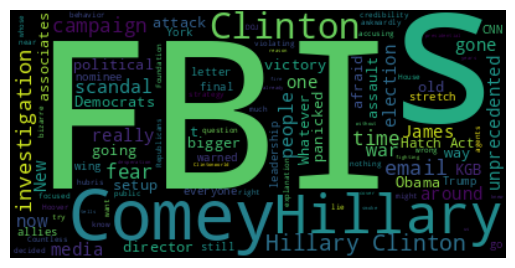

In [47]:
# Generate a word cloud image for a given text (Row 1)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # for generating word cloud image
text = df['text'][0] # get the text from the first row
wordcloud = WordCloud().generate(text) # generate the word cloud image
plt.imshow(wordcloud, interpolation='bilinear') # plot the word cloud image, interpolation='bilinear' for smooth image
plt.axis("off")
plt.show()

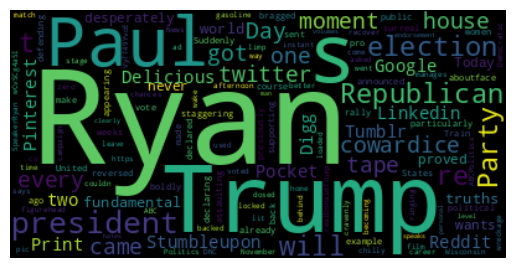

In [34]:
# Generate a word cloud image for a given text (Row 2)
text = df['text'][1]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

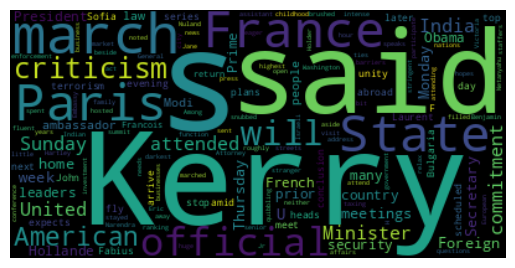

In [35]:
# Generate a word cloud image for a given text (Row 3)
text = df['text'][2]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
df.describe() # prints the description of the dataset

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


In [37]:
df.info() # prints the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


In [38]:
labels = df.label # store the labels in a variable
labels.head(15) # print the first 15 labels

0     FAKE
1     FAKE
2     REAL
3     FAKE
4     REAL
5     FAKE
6     FAKE
7     REAL
8     REAL
9     REAL
10    REAL
11    REAL
12    FAKE
13    FAKE
14    REAL
Name: label, dtype: object

In [39]:
# Print the count of each class
print(labels.value_counts())

label
REAL    3171
FAKE    3164
Name: count, dtype: int64


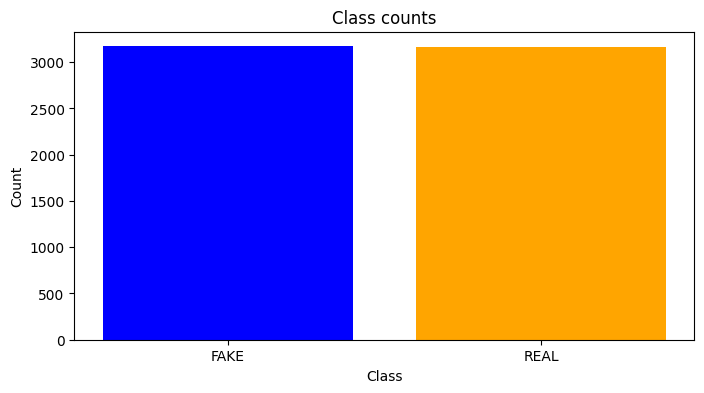

In [40]:
# Plot bar chart for each class count
plt.figure(figsize=(8,4))
plt.bar(labels.unique(), labels.value_counts(), color=['blue', 'orange'])
plt.title('Class counts')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### This shows that classes are balanced, thus do not require oversampling or undersampling

In [41]:
# Split data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=42, stratify = labels) # stratify = labels for equal distribution of classes in training and testing sets

In [42]:
# Initialize a TfidfVectorizer (Term frequency-inverse document frequency) to convert text to vectors
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7) # Initialize a TfidfVectorizer
tfidf_train=tfidf_vectorizer.fit_transform(x_train) # Fit and transform train set, transform test set
tfidf_test=tfidf_vectorizer.transform(x_test)

In [43]:
# Shape of the train and test sets after vectorization
print(tfidf_train.shape)
print(tfidf_test.shape)

(5068, 61595)
(1267, 61595)


In [44]:
# # Tried CountVectorizer but TfidfVectorizer gave better results
# # Initialize a CountVectorizer to convert text to vectors
# count_vectorizer = CountVectorizer(stop_words='english', max_df=0.7)
# count_train = count_vectorizer.fit_transform(x_train)
# count_test = count_vectorizer.transform(x_test)

In [45]:
# Tried implementing VarianceThreshold for feature selection but it didn't improve the accuracy, thus didn't opt for any feature selection techniques

# # VarianceThreshold for feature selection

# # Initialize a VarianceThreshold
# thresholder = VarianceThreshold(threshold=0.5)
# # Fit the VarianceThreshold on training set
# thresholder.fit(count_train)
# # Transform training set
# count_train = thresholder.transform(count_train)
# # Transform test set
# count_test = thresholder.transform(count_test)

In [46]:
# Passive Aggressive Classifier using TF-IDF
pac = PassiveAggressiveClassifier(random_state=42) # Initialize a PassiveAggressiveClassifier

# Parameter grid for grid search
param_grid_pac = {
    'max_iter': [500, 600], # Maximum number of passes over the training data
    'C': [0.1, 1, 10], # Regularization parameter
    'tol': [1e-3, 1e-4] # Tolerance for stopping criteria
}

# Grid search
grid_search_pac = GridSearchCV(pac, param_grid_pac, cv=5, n_jobs=-1) # cv=5 for 5-fold cross-validation, n_jobs=-1 to use all processors
grid_search_pac.fit(tfidf_train, y_train) # Fit the grid search to the training data

# Print best parameters and corresponding accuracy
print(f"Passive Aggressive Classifier - Best Parameters: {grid_search_pac.best_params_}") 
y_pred_pac = grid_search_pac.predict(tfidf_test) # Predict on the test set

# Calculate accuracy
accuracy_pac = accuracy_score(y_test, y_pred_pac)
print(f'Accuracy: {round(accuracy_pac * 100, 2)}%')

# Print confusion matrix
conf_matrix_pac = confusion_matrix(y_test, y_pred_pac, labels=['FAKE', 'REAL']) # labels=['FAKE', 'REAL'] to fix the order of the labels
print(conf_matrix_pac)

# Calculate F1 score
f1_pac = f1_score(y_test, y_pred_pac, pos_label='FAKE')  # Assuming 'FAKE' is the positive class
print(f'F1 Score: {round(f1_pac, 2)}')

Passive Aggressive Classifier - Best Parameters: {'C': 1, 'max_iter': 500, 'tol': 0.001}
Accuracy: 94.08%
[[598  35]
 [ 40 594]]
F1 Score: 0.94


In [96]:
# # Passive Aggressive Classifier using Count Vectorizer
# pac = PassiveAggressiveClassifier(random_state=42) # Initialize a PassiveAggressiveClassifier

# # Parameter grid for grid search
# param_grid_pac = {
#     'max_iter': [500, 600], # Maximum number of passes over the training data
#     'C': [0.1, 1, 10,0.01], # Regularization parameter
#     'tol': [1e-3, 1e-4, 2e-4], # Tolerance for stopping criteria
#     'loss': ['hinge', 'squared_hinge'] # Loss function
# }

# # Grid search
# grid_search_pac = GridSearchCV(pac, param_grid_pac, cv=5, n_jobs=-1) # cv=5 for 5-fold cross-validation, n_jobs=-1 to use all processors
# grid_search_pac.fit(count_train, y_train) # Fit the grid search to the training data

# # Print best parameters and corresponding accuracy
# print(f"Passive Aggressive Classifier - Best Parameters: {grid_search_pac.best_params_}") 
# y_pred_pac = grid_search_pac.predict(count_test) # Predict on the test set

# # Calculate accuracy
# accuracy_pac = accuracy_score(y_test, y_pred_pac)
# print(f'Accuracy: {round(accuracy_pac * 100, 2)}%')

# # Print confusion matrix
# conf_matrix_pac = confusion_matrix(y_test, y_pred_pac, labels=['FAKE', 'REAL']) # labels=['FAKE', 'REAL'] to fix the order of the labels
# print(conf_matrix_pac)

# # Calculate F1 score
# f1_pac = f1_score(y_test, y_pred_pac, pos_label='FAKE')  # Assuming 'FAKE' is the positive class
# print(f'F1 Score: {round(f1_pac, 2)}')

Passive Aggressive Classifier - Best Parameters: {'C': 0.01, 'loss': 'squared_hinge', 'max_iter': 500, 'tol': 0.001}
Accuracy: 90.69%
[[575  58]
 [ 60 574]]
F1 Score: 0.91


In [67]:
# Random Forest Classifier
rfc = RandomForestClassifier(random_state=42) # Create a random forest classifier

# Parameter grid for grid search
param_grid_rfc = {
    'n_estimators': [50, 100, 200], # Number of trees in the forest
    'max_depth': [None, 10, 20], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
}

# Grid search
grid_search_rfc = GridSearchCV(rfc, param_grid_rfc, cv=5, n_jobs=-1) # cv=5 for 5-fold cross-validation, n_jobs=-1 to use all processors
grid_search_rfc.fit(tfidf_train, y_train) # Fit the random forest classifier to the training data

# Print best parameters and corresponding accuracy
print(f"Random Forest Classifier - Best Parameters: {grid_search_rfc.best_params_}") # Print the best parameters
y_pred_rfc = grid_search_rfc.predict(tfidf_test) # Predict the labels of the test set

# Calculate accuracy
accuracy_rfc = accuracy_score(y_test, y_pred_rfc) # Calculate accuracy
print(f'Accuracy: {round(accuracy_rfc * 100, 2)}%')

# Print confusion matrix
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc, labels=['FAKE', 'REAL']) # Print confusion matrix
print(conf_matrix_rfc)

# Calculate F1 score
f1_rfc = f1_score(y_test, y_pred_rfc, pos_label='FAKE')  # Assuming 'FAKE' is the positive class
print(f'F1 Score: {round(f1_rfc, 2)}')


Random Forest Classifier - Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 91.63%
[[575  58]
 [ 48 586]]
F1 Score: 0.92


In [9]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42) # Create a decision tree classifier

# Parameter grid for grid search
param_grid_dtc = {
    'max_depth': [None, 10, 20], # Gives the maximum depth of the tree
    'min_samples_split': [2, 5, 10], # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] # The minimum number of samples required to be at a leaf node
}

# Grid search
grid_search_dtc = GridSearchCV(dtc, param_grid_dtc, cv=5, n_jobs=-1) # cv=5 for 5-fold cross-validation, n_jobs=-1 to use all processors
grid_search_dtc.fit(tfidf_train, y_train) # Fit the decision tree classifier to the training data

# Print best parameters and corresponding accuracy
print(f"Decision Tree Classifier - Best Parameters: {grid_search_dtc.best_params_}")
y_pred_dtc = grid_search_dtc.predict(tfidf_test)

# Calculate accuracy
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f'Accuracy: {round(accuracy_dtc * 100, 2)}%')

# Print confusion matrix
conf_matrix_dtc = confusion_matrix(y_test, y_pred_dtc, labels=['FAKE', 'REAL'])
print(conf_matrix_dtc)

# Calculate F1 score
f1_dtc = f1_score(y_test, y_pred_dtc, pos_label='FAKE')  # Assuming 'FAKE' is the positive class
print(f'F1 Score: {round(f1_dtc, 2)}')

Decision Tree Classifier - Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 81.77%
[[535  98]
 [133 501]]
F1 Score: 0.82


In [ ]:
# Naive Bayes (Multinomial)
nb = MultinomialNB(random_state=42)

# Parameter grid for grid search
param_grid_nb = {
    'alpha': [0.1, 1, 10], # Additive (Laplace/Lidstone) smoothing parameter
    'fit_prior': [True, False], # Whether to learn class prior probabilities or not
    'class_prior': [None, [0.5, 0.5]], # Prior probabilities of the classes. If specified the priors are not adjusted according to the data
}

# Grid search
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, n_jobs=-1) # cv=5 for 5-fold cross-validation, n_jobs=-1 to use all processors
grid_search_nb.fit(tfidf_train, y_train) # Fit the naive bayes classifier to the training data

# Print best parameters and corresponding accuracy
print(f"Naive Bayes (Multinomial) - Best Parameters: {grid_search_nb.best_params_}") 
y_pred_nb = grid_search_nb.predict(tfidf_test) # Predict the labels of the test set

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb) # Calculate accuracy
print(f'Accuracy: {round(accuracy_nb * 100, 2)}%') 

# Print confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb, labels=['FAKE', 'REAL']) # Print confusion matrix
print(conf_matrix_nb)

# Calculate F1 score
f1_nb = f1_score(y_test, y_pred_nb, pos_label='FAKE')  # Assuming 'FAKE' is the positive class
print(f'F1 Score: {round(f1_nb, 2)}')

Naive Bayes (Multinomial) - Best Parameters: {'alpha': 0.1, 'class_prior': None, 'fit_prior': True}
Accuracy: 90.69%
[[550  78]
 [ 40 599]]
F1 Score: 0.9


In [24]:
# AdaBoost Classifier
be1 = RandomForestClassifier(n_estimators=100, random_state=42) # After hyperparameter tuning of RF these are the results
be2 = DecisionTreeClassifier(max_depth=10, criterion='entropy', max_features='sqrt', min_samples_split=6, ccp_alpha=0.01) # After hyperparameter tuning of DT these are the results
clf = AdaBoostClassifier(algorithm='SAMME.R', n_estimators=100) # After hyperparameter tuning of AdaBoost these are the results
param_grid_ab = {
    'clf__base_estimator': [be1, be2], # Base estimator
    'clf__learning_rate': [0.1, 1, 0.02], # Learning rate shrinks the contribution of each classifier by learning_rate
    'clf__random_state': [10, 42], # Seed of the pseudo random number generator
}

# Grid search
grid_search_adaboost = GridSearchCV(adaboost, param_grid_adaboost, cv=5, n_jobs=-1)
grid_search_adaboost.fit(tfidf_train, y_train)

# Print best parameters and corresponding accuracy
print(f"AdaBoost Classifier - Best Parameters: {grid_search_adaboost.best_params_}")
y_pred_adaboost = grid_search_adaboost.predict(tfidf_test)

# Calculate accuracy
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f'Accuracy: {round(accuracy_adaboost * 100, 2)}%')

# Print confusion matrix
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost, labels=['FAKE', 'REAL'])
print(conf_matrix_adaboost)

# Calculate F1 score
f1_adaboost = f1_score(y_test, y_pred_adaboost, pos_label='FAKE')  # Assuming 'FAKE' is the positive class
print(f'F1 Score: {round(f1_adaboost, 2)}')

AdaBoost Classifier - Best Parameters: {'learning_rate': 0.2, 'n_estimators': 200}
Accuracy: 89.66%
[[575  53]
 [ 78 561]]
F1 Score: 0.9


In [ ]:
# Support Vector Machine
svm = SVC(random_state = 42) # Initialize a Support Vector Machine

# Parameter grid for grid search
param_grid_svm = {
    'C': [0.1, 1, 10], # Regularization parameter
    'kernel': ['linear', 'rbf'], # Specifies the kernel type to be used in the algorithm
    'gamma': ['scale', 'auto'] # Kernel coefficient
}

# Grid search
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, n_jobs=-1) # cv=5 for 5-fold cross-validation, n_jobs=-1 to use all processors
grid_search_svm.fit(tfidf_train, y_train) # Fit the SVM to the training data

# Print best parameters and corresponding accuracy
print(f"SVM - Best Parameters: {grid_search_svm.best_params_}") 
y_pred_svm = grid_search_svm.predict(tfidf_test) # Predict the labels of the test set

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {round(accuracy_svm * 100, 2)}%')

# Print confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm, labels=['FAKE', 'REAL'])
print(conf_matrix_svm)

# Calculate F1 score
f1_svm = f1_score(y_test, y_pred_svm, pos_label='FAKE')  # Assuming 'FAKE' is the positive class
print(f'F1 Score: {round(f1_svm, 2)}')


SVM - Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 93.29%
[[593  35]
 [ 50 589]]
F1 Score: 0.93


In [ ]:
# Logistic Regression
lr = LogisticRegression(random_state=42)

# Parameter grid for grid search
param_grid_lr = {
    'C': [0.1, 1, 10], # Regularization parameter (inverse of regularization strength)
    'max_iter': [500, 600], # Maximum number of iterations taken for the solvers to converge
    'solver': ['liblinear', 'lbfgs'] # Algorithm to use in the optimization problem
}

# Grid search
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, n_jobs=-1) # cv=5 for 5-fold cross-validation, n_jobs=-1 to use all processors
grid_search_lr.fit(tfidf_train, y_train) # Fit the logistic regression model to the training data

# Print best parameters and corresponding accuracy
print(f"Logistic Regression - Best Parameters: {grid_search_lr.best_params_}")
y_pred_lr = grid_search_lr.predict(tfidf_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {round(accuracy_lr * 100, 2)}%')
# Calculate precision
precision_lr = precision_score(y_test, y_pred_lr, pos_label='FAKE')  # Assuming 'FAKE' is the positive class
print(f'Precision: {round(precision_lr, 2)}')
# Calculate recall
recall_lr = recall_score(y_test, y_pred_lr, pos_label='FAKE')  # Assuming 'FAKE' is the positive class
print(f'Recall: {round(recall_lr, 2)}')

# Print confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr, labels=['FAKE', 'REAL'])
print("Confusion Matrix: \n", conf_matrix_lr)

# Calculate F1 score
f1_lr = f1_score(y_test, y_pred_lr, pos_label='FAKE')  # Assuming 'FAKE' is the positive class
print(f'F1 Score: {round(f1_lr, 2)}')


Logistic Regression - Best Parameters: {'C': 10, 'max_iter': 500, 'solver': 'lbfgs'}
Accuracy: 93.45%
Precision: 0.93
Recall: 0.94
Confusion Matrix: 
 [[592  36]
 [ 47 592]]
F1 Score: 0.93


#### After training various classifiers and hyperparametric tuning, we have achieved the best results using Passive Aggressive Classifier with an accuracy of 94.08% and F1-Score of 0.94. Apart from TF-IDF Vectorizer for feature extraction, we also tried implementing the Bag of Words (Count Vectorizer) method which gave slightly poor results as compared to TF-IDF Vectorizer method. Thus all the other classifiers have been implemented based on TF-IDF Vectorizer.